In [84]:
import pandas as pd
import numpy as np
import math as m
#from datetime import datetime
from datetime import date, datetime, timedelta
import csv
import matplotlib
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('RS_newFile2.txt')  

In [3]:
pd.read_csv('RS_newFile2.txt')  

,Date Time RS_Avg doy height SZA RS
0,yyyy-mm-dd hh:mm:ss W/m2 doy deg deg W/m2
1,1 2009-01-01 00:00:00 0.00 1 -70.53 160.53 NA
2,2 2009-01-01 00:10:00 0.00 1 -70.35 160.35 NA
3,3 2009-01-01 00:20:00 0.00 1 -69.96 159.96 NA
4,4 2009-01-01 00:30:00 0.00 1 -69.37 159.37 NA
...,...
730243,730243 2022-12-31 23:10:00 0.00 365 -68.27 158...
730244,730244 2022-12-31 23:20:00 0.00 365 -69.11 159...
730245,730245 2022-12-31 23:30:00 0.00 365 -69.78 159...
730246,730246 2022-12-31 23:40:00 0.00 365 -70.25 160...


In [19]:
print(df.columns.tolist())

['Date Time RS_Avg doy height SZA RS']


In [22]:
df = pd.read_csv('RS_newFile.txt')


In [23]:
print(df.columns.tolist())

['Date Time doy height SZA RS']


In [24]:
df = pd.read_csv('PER10min2009_2022_RS_H.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_14016\818730342.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PER10min2009_2022_RS_H.csv')


In [25]:
print(df.columns.tolist())

['TIMESTAMP', 'RS_Std', 'HumR1min_Avg', 'RS_Avg']


In [26]:
df = pd.read_csv('output_file.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_14016\3866723669.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output_file.csv')


In [27]:
print(df.columns.tolist())

['index', 'TIMESTAMP', 'RS_Std', 'HumR1min_Avg', 'RS_Avg', 'zenith_angle_deg']


In [ ]:
# Afegim doy i hour

In [34]:
df['TIMESTAMP'].dayofyear

AttributeError: 'Series' object has no attribute 'dayofyear'

In [39]:
df['TIMESTAMP']  = pd.to_datetime(df['TIMESTAMP'])

In [43]:
df['TIMESTAMP'].year


AttributeError: 'Series' object has no attribute 'year'

In [44]:
pd.to_datetime(df['TIMESTAMP']).dt.year

0         2009.0
1         2009.0
2         2009.0
3         2009.0
4         2009.0
           ...  
730242    2022.0
730243    2022.0
730244    2022.0
730245    2022.0
730246    2022.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [45]:
pd.to_datetime(df['TIMESTAMP']).dt.month

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
730242    12.0
730243    12.0
730244    12.0
730245    12.0
730246    12.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [46]:
pd.to_datetime(df['TIMESTAMP']).dt.dayofyear

0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
          ...  
730242    365.0
730243    365.0
730244    365.0
730245    365.0
730246    365.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [47]:
pd.to_datetime(df['TIMESTAMP']).dt.hour

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
730242    23.0
730243    23.0
730244    23.0
730245    23.0
730246    23.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [48]:
pd.to_datetime(df['TIMESTAMP']).dt.minute

0          0.0
1         10.0
2         20.0
3         30.0
4         40.0
          ... 
730242    10.0
730243    20.0
730244    30.0
730245    40.0
730246    50.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [49]:
pd.to_datetime(df['TIMESTAMP']).dt.hour + pd.to_datetime(df['TIMESTAMP']).dt.minute/60

0          0.000000
1          0.166667
2          0.333333
3          0.500000
4          0.666667
            ...    
730242    23.166667
730243    23.333333
730244    23.500000
730245    23.666667
730246    23.833333
Name: TIMESTAMP, Length: 730247, dtype: float64

In [50]:
df['Hour'] = pd.to_datetime(df['TIMESTAMP']).dt.hour + pd.to_datetime(df['TIMESTAMP']).dt.minute/60
df.to_csv('results_1.csv', index=False)

In [ ]:
#--------------------------

In [85]:
df = pd.read_csv('results_1.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\3911663359.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results_1.csv')


In [87]:
df['Day'] = pd.to_datetime(df['TIMESTAMP']).dt.dayofyear + pd.to_datetime(df['TIMESTAMP']).dt.hour/24 + pd.to_datetime(df['TIMESTAMP']).dt.minute/1440
df.to_csv('results_1.csv', index=False)

# Yolanda, a partir d'aqui !

# Hem d'afegir una columna per hores al dataframe ---> FET


In [37]:
df = pd.read_csv('results_1.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\3911663359.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results_1.csv')


In [88]:
pd.read_csv('results_1.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\1570415248.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('results_1.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
0,2009-01-01 00:00:00,NaN,17.19,NaN,160.519214,0.000000,1.000000,NaN
1,2009-01-01 00:10:00,NaN,15.89,NaN,160.341724,0.166667,1.006944,NaN
2,2009-01-01 00:20:00,NaN,14.61,NaN,159.949193,0.333333,1.013889,NaN
3,2009-01-01 00:30:00,NaN,14.95,NaN,159.354097,0.500000,1.020833,NaN
4,2009-01-01 00:40:00,NaN,13.18,NaN,158.573632,0.666667,1.027778,NaN
...,...,...,...,...,...,...,...,...
730242,2022-12-31 23:10:00,0.0,53.41,NaN,158.271643,23.166667,365.965278,NaN
730243,2022-12-31 23:20:00,0.0,51.99,NaN,159.116401,23.333333,365.972222,NaN
730244,2022-12-31 23:30:00,0.0,51.62,NaN,159.782794,23.500000,365.979167,NaN
730245,2022-12-31 23:40:00,0.0,48.46,NaN,160.252351,23.666667,365.986111,NaN


In [28]:
df['kt_10min'][30:90]
df['kt_10min'][:40]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
Name: kt_10min, dtype: float64

In [89]:
df['RS_Avg'] = df['RS_Avg'].astype(float)

In [5]:
df['RS_Avg'][30:90] 

30      0.000
31      0.000
32      0.000
33      0.000
34      0.000
35      0.000
36      0.000
37      0.000
38      0.000
39      0.000
40      0.000
41      0.000
42      0.000
43      0.000
44      0.000
45      1.066
46      7.089
47     13.630
48     20.700
49     27.450
50     35.130
51     43.120
52     52.390
53     56.690
54     65.500
55    155.300
56    205.100
57    227.700
58    239.400
59    228.000
60    250.500
61    240.400
62    263.400
63    295.900
64    302.900
65    283.800
66    283.000
67    322.100
68    304.700
69    344.700
70    378.200
71    368.600
72    365.800
73    377.400
74    389.200
75    427.400
76    383.100
77    403.200
78    344.300
79    318.600
80    288.300
81    237.100
82    228.200
83    234.300
84    209.400
85    209.400
86    232.000
87    225.900
88    164.700
89    141.900
Name: RS_Avg, dtype: float64

In [6]:
df['RS_Avg'][df['zenith_angle_deg']>83] = np.nan

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\4106449748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS_Avg'][df['zenith_angle_deg']>83] = np.nan


In [7]:
df['RS_Avg'][30:90] 

30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50     35.13
51     43.12
52     52.39
53     56.69
54     65.50
55    155.30
56    205.10
57    227.70
58    239.40
59    228.00
60    250.50
61    240.40
62    263.40
63    295.90
64    302.90
65    283.80
66    283.00
67    322.10
68    304.70
69    344.70
70    378.20
71    368.60
72    365.80
73    377.40
74    389.20
75    427.40
76    383.10
77    403.20
78    344.30
79    318.60
80    288.30
81    237.10
82    228.20
83    234.30
84    209.40
85    209.40
86    232.00
87    225.90
88    164.70
89    141.90
Name: RS_Avg, dtype: float64

In [8]:
df['zenith_angle_deg'][30:100]

30    115.543016
31    113.724154
32    111.914036
33    110.113925
34    108.325085
         ...    
95     84.564919
96     86.030586
97     87.529954
98     89.061051
99     90.621982
Name: zenith_angle_deg, Length: 70, dtype: float64

In [108]:
G0 = 1367 # Wm-2
lat_cancer = m.radians(23+45/60)
lat_rad = m.radians(41.48)
lat = lat_rad

#doy....
#hora...

hangle1 = 15*(df['Hour']- 1/6 - 12)*(np.pi/180)
hangle2 = 15*(df['Hour'] - 12)*(np.pi/180)
sol_decl_angle = lat_cancer*np.sin(2*np.pi*(df['Day'] + 284)/365)
gamma = 2*np.pi*(df['Day']-1)/365
E0 = 1.000110 + 0.034221*np.cos(gamma) + 0.001280*np.sin(gamma) + 0.000719*np.cos(2*gamma) + 0.000077*np.sin(2*gamma)

C = (np.sin(hangle2) - np.sin(hangle1))*np.cos(lat)*np.cos(sol_decl_angle) +\
(np.pi/72)*np.sin(lat)*np.sin(sol_decl_angle)

S0 = 86400*G0*E0*C/(2*np.pi)

In [109]:
S0

0        -806411.925377
1        -806409.532004
2        -805295.565666
3        -803072.128041
4        -799743.432761
              ...      
730242   -789824.739159
730243   -795337.764195
730244   -799760.385623
730245   -803084.166133
730246   -805302.760038
Length: 730247, dtype: float64

In [110]:
S0[S0 < 0 ] = np.nan

In [92]:
df[df['RS_Avg']<0 ]=np.nan

In [179]:
lst1 = df['RS_Avg'] 
lst1 = np.array(lst1)

In [93]:
S0[22543]

675040.944936096

In [180]:
np.where(lst1 <0)

(array([], dtype=int64),)

In [51]:
df['TIMESTAMP']  = pd.to_datetime(df['TIMESTAMP'])

In [78]:
a = pd.read_csv('results_1.csv', index_col=0, parse_dates=True, infer_datetime_format=True)

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\1057316088.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv('results_1.csv', index_col=0, parse_dates=True, infer_datetime_format=True)


In [55]:
b = a[::-1]

In [82]:
a.loc['2009-06-06'][70:100]

,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
TIMESTAMP,,,,,,,
2009-06-06 11:40:00,NaN,83.8,437.2,19.951514,11.666667,6.486111,0.718167
2009-06-06 11:50:00,NaN,86.2,493.7,19.792440,11.833333,6.493056,0.806032
2009-06-06 12:00:00,NaN,85.8,843.0,19.851778,12.000000,6.500000,1.372106
2009-06-06 12:10:00,NaN,86.2,758.4,20.127557,12.166667,6.506944,1.234371
2009-06-06 12:20:00,NaN,85.6,510.7,20.610933,12.333333,6.513889,0.833714
2009-06-06 12:30:00,NaN,87.1,318.0,21.287501,12.500000,6.520833,0.522286
2009-06-06 12:40:00,NaN,86.8,505.3,22.139182,12.666667,6.527778,0.837542
2009-06-06 12:50:00,NaN,84.7,790.7,23.146189,12.833333,6.534722,1.326842
2009-06-06 13:00:00,NaN,82.6,526.1,24.288658,13.000000,6.541667,0.896688


In [67]:
b['2009-06-06']#[50:100]

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\983198295.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  b['2009-06-06']#[50:100]


,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
TIMESTAMP,,,,,,,
2009-06-06 23:50:00,NaN,86.6,NaN,114.776604,23.833333,6.993056,NaN
2009-06-06 23:40:00,NaN,87.4,NaN,114.717278,23.666667,6.986111,NaN
2009-06-06 23:30:00,NaN,87.7,NaN,114.576522,23.500000,6.979167,NaN
2009-06-06 23:20:00,NaN,87.5,NaN,114.354876,23.333333,6.972222,NaN
2009-06-06 23:10:00,NaN,88.7,NaN,114.053182,23.166667,6.965278,NaN
...,...,...,...,...,...,...,...
2009-06-06 00:40:00,NaN,88.9,NaN,113.946488,0.666667,6.027778,NaN
2009-06-06 00:30:00,NaN,87.2,NaN,114.293503,0.500000,6.020833,NaN
2009-06-06 00:20:00,NaN,83.4,NaN,114.560959,0.333333,6.013889,NaN


In [119]:
df['TIMESTAMP'][29000:45000]

28000    2009-07-14 16:30:00
28001    2009-07-14 16:40:00
28002    2009-07-14 16:50:00
28003    2009-07-14 17:00:00
28004    2009-07-14 17:10:00
                ...         
49995    2009-12-14 09:20:00
49996    2009-12-14 09:30:00
49997    2009-12-14 09:40:00
49998    2009-12-14 09:50:00
49999    2009-12-14 10:00:00
Name: TIMESTAMP, Length: 22000, dtype: object

In [94]:
kt= 600*df['RS_Avg']/S0
kt

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
730242   NaN
730243   NaN
730244   NaN
730245   NaN
730246   NaN
Length: 730247, dtype: float64

In [95]:
df['kt_10min'] = 600*df['RS_Avg']/S0
df.to_csv('results_1.csv', index=False)

In [182]:
np.where(kt>2)

(array([  5283,   5427,   5570, ..., 723509, 723653, 723797], dtype=int64),)

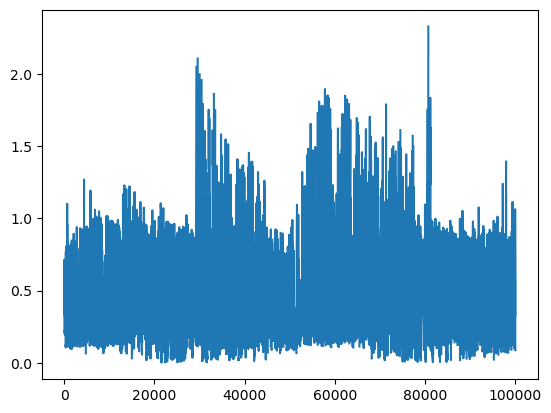

In [112]:
plt.plot(kt[:100000])

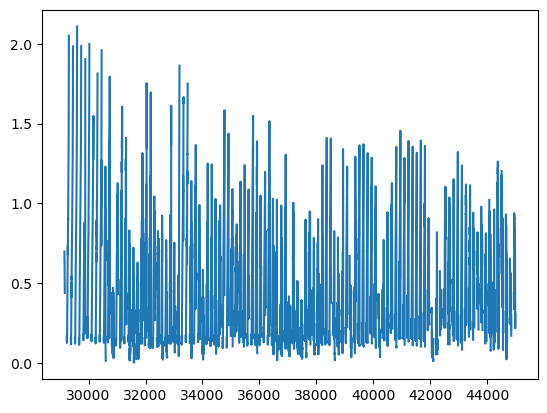

In [124]:
plt.plot(kt[29150:45000])

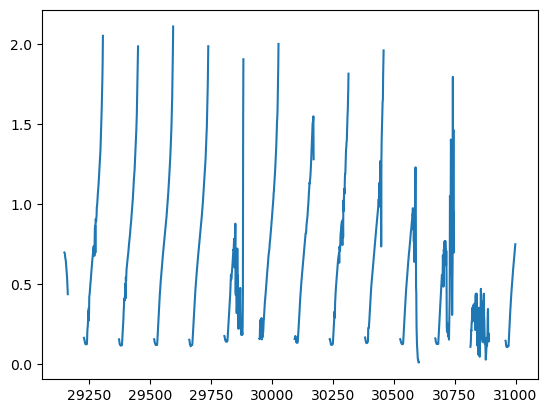

In [125]:
plt.plot(kt[29150:31000])

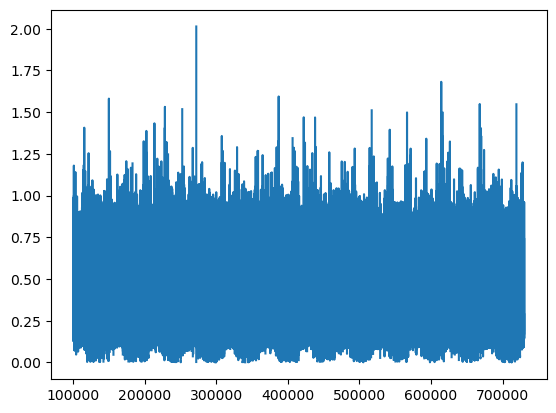

In [97]:
plt.plot(kt[100000:1050000])

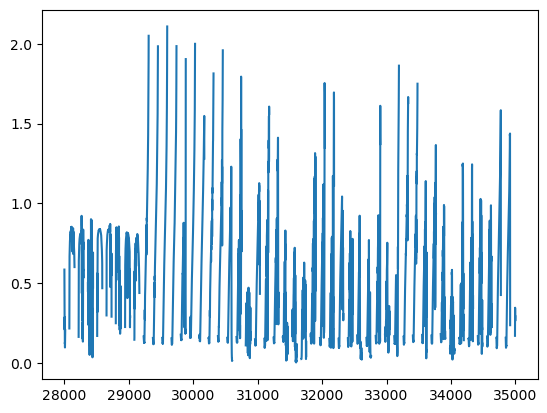

In [128]:
plt.plot(kt[28000:35000])

Text(0.5, 1.0, 'Vall Perafita-Claror-Madriu')

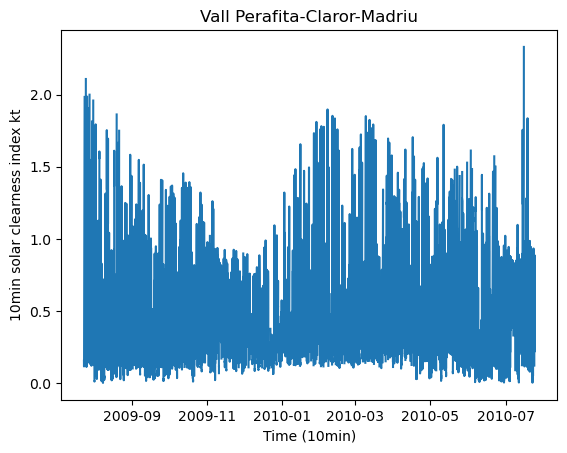

In [172]:
plt.plot(pd.to_datetime(df['TIMESTAMP'][29320:82000]),kt[29320:82000])
plt.xlabel('Time (10min)')
plt.ylabel('10min solar clearness index kt')
plt.title('Vall Perafita-Claror-Madriu')
#plt.savefig('10minclearness_index_postchange')


Text(0.5, 1.0, 'Vall Perafita-Claror-Madriu')

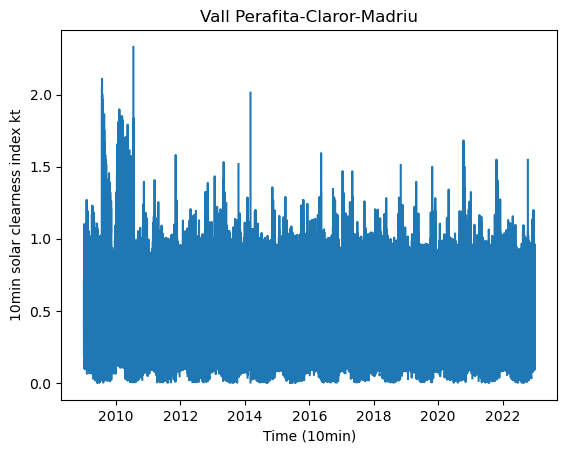

In [160]:
plt.plot(pd.to_datetime(df['TIMESTAMP']),kt)
plt.xlabel('Time (10min)')
plt.ylabel('10min solar clearness index kt')
plt.title('Vall Perafita-Claror-Madriu')

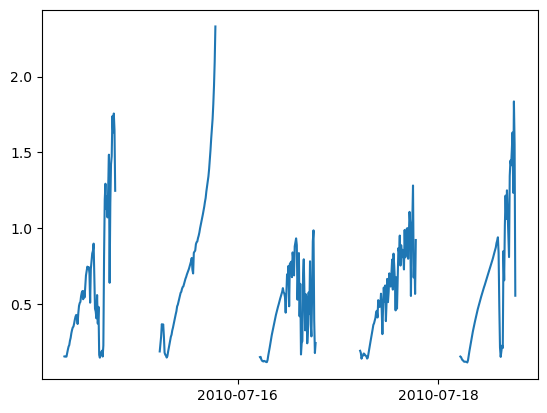

In [181]:
fig, ax = plt.subplots()

plt.plot(pd.to_datetime(df['TIMESTAMP'][80500:81200]),kt[80500:81200])
ax.xaxis.set_major_locator(plt.MaxNLocator(3))

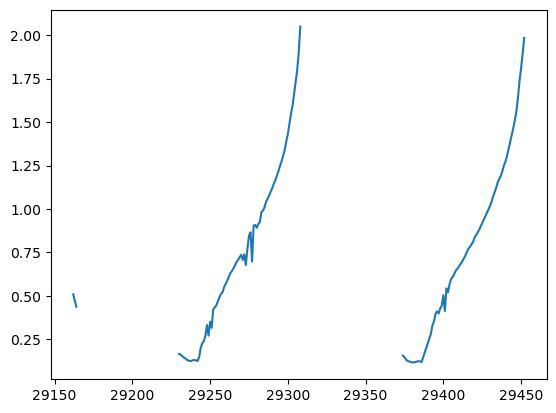

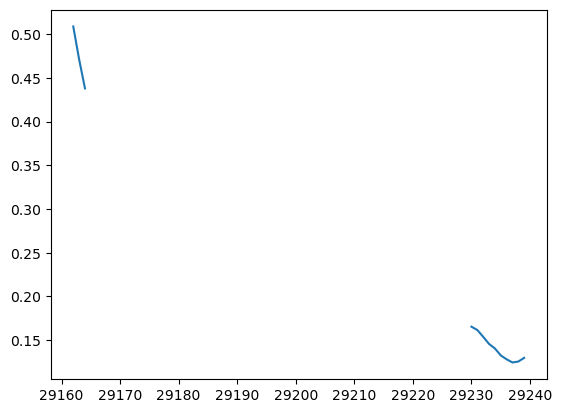

In [155]:
plt.plot(kt[29162:29500])
plt.show()

plt.plot(kt[29162:29240])
plt.show()

In [99]:
kt.mean()

0.5468946401974358

In [161]:
#Provam de fer un RS_Avg =np.nan per SZA >85

In [166]:
pd.read_csv('results_1.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_14016\1570415248.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('results_1.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day
0,2009-01-01 00:00:00,NaN,17.19,0.0,160.519214,0.000000,1.000000
1,2009-01-01 00:10:00,NaN,15.89,0.0,160.341724,0.166667,1.006944
2,2009-01-01 00:20:00,NaN,14.61,0.0,159.949193,0.333333,1.013889
3,2009-01-01 00:30:00,NaN,14.95,0.0,159.354097,0.500000,1.020833
4,2009-01-01 00:40:00,NaN,13.18,0.0,158.573632,0.666667,1.027778
...,...,...,...,...,...,...,...
730242,2022-12-31 23:10:00,0.0,53.41,0.0,158.271643,23.166667,31.965278
730243,2022-12-31 23:20:00,0.0,51.99,0.0,159.116401,23.333333,31.972222
730244,2022-12-31 23:30:00,0.0,51.62,0.0,159.782794,23.500000,31.979167
730245,2022-12-31 23:40:00,0.0,48.46,0.0,160.252351,23.666667,31.986111


In [165]:
df = df.drop(columns= ['index'])
#columns=['column_nameA', 'column_nameB']

#df = df.drop('index', axis=1)
df.to_csv('results_1.csv', index=False)

In [173]:
df['zenith_angle_deg'][48]

85.2346765009949

# Gruix de Neu

In [202]:
file='PER10MIN2009_2022_GN.csv'
df2 = pd.read_csv(file, delimiter=";", decimal=",",parse_dates = ['TIMESTAMP'])
pd.read_csv(file, delimiter=";", decimal=",",parse_dates = ['TIMESTAMP'] )

,TIMESTAMP,Gruix_neu
0,2009-01-01 00:00:00,0.336
1,2009-01-01 00:10:00,0.332
2,2009-01-01 00:20:00,0.329
3,2009-01-01 00:30:00,0.327
4,2009-01-01 00:40:00,0.332
...,...,...
740813,2023-01-02 07:10:00,0.338
740814,2023-01-02 07:20:00,0.337
740815,2023-01-02 07:30:00,0.340
740816,2023-01-02 07:40:00,0.340


In [194]:
#df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP']).dt.strftime('%Y/%M/%D HH:MM:SS')
#df2.to_csv('GN_0.csv', index=False)

#FAIL!!!

In [211]:
neu = df2['Gruix_neu']
neu = np.array(neu)
type(neu[1])

numpy.float64

In [206]:
df2['TIMESTAMP'][3000]

Timestamp('2009-01-21 20:00:00')

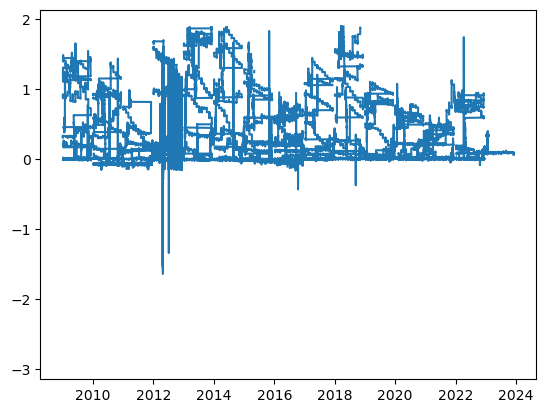

In [212]:
plt.plot(df2['TIMESTAMP'],neu)

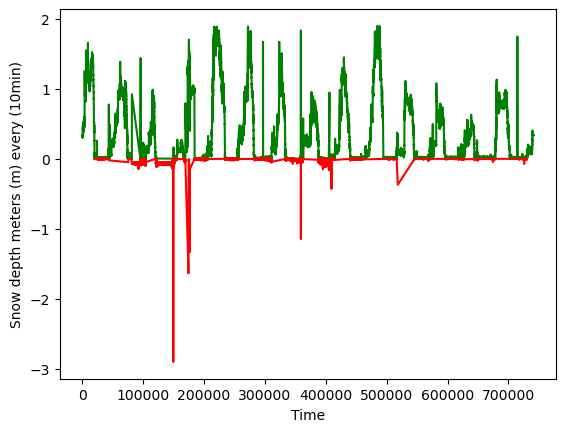

In [231]:
#plt.plot(neu)
fig, ax = plt.subplots()
num_dates = np.arange(len(neu))
x= num_dates
#x = pd.to_datetime(df2['TIMESTAMP'])
fx = neu
ax.plot(x[fx>=0], fx[fx>=0], 'g')
ax.plot(x[fx<0],  fx[fx<0],  'r')


plt.xlabel('Time')
plt.ylabel('Snow depth meters (m) every (10min)')
plt.savefig('Snow_height')
plt.show()


# No encaixa els pics de kt per sobre de 1 (de major freqüència) amb els pics de neu

# Cada any tenim aproximadament 1 metre 

# ERROR MOLT GRANS 2012 APROX (ALÇADA DE NEU NEGATIVA)
